In [41]:
import numpy as np
import pandas as pd
from pandas_datareader import data
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from nsepy import get_history as gh
plt.style.use('fivethirtyeight') #setting matplotlib style
from pandas_datareader import data

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import date
from nsepy import get_history as gh
plt.style.use('fivethirtyeight')

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import  risk_models
from pypfopt import expected_returns
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices


In [44]:
df = data.DataReader(['RELIANCE.NS', 'CIPLA.NS', 'MARUTI.NS', 'HINDUNILVR.NS','ICICIBANK.NS','NESTLEIND.NS','TCS.NS','RAMCOCEM.NS','NIFTYBEES.NS','BANKBEES.NS'], 'yahoo', start='2016/01/01', end='2022/02/17')
df.head()

Attributes   Adj Close                                                      \
Symbols    RELIANCE.NS    CIPLA.NS    MARUTI.NS HINDUNILVR.NS ICICIBANK.NS   
Date                                                                         
2016-01-01  484.996338  638.705994  4352.271484    781.844177   227.072784   
2016-01-04  475.419189  629.252441  4297.991699    784.080383   220.640518   
2016-01-05  480.124268  624.574219  4285.137207    773.994141   221.633423   
2016-01-06  493.045044  635.538452  4204.302734    769.521606   215.934998   
2016-01-07  483.993256  621.260620  4004.540039    748.710083   213.042633   

Attributes                                                                 \
Symbols    NESTLEIND.NS       TCS.NS RAMCOCEM.NS NIFTYBEES.NS BANKBEES.NS   
Date                                                                        
2016-01-01  5280.468262  1075.699219  379.417572    80.505997  171.347000   
2016-01-04  5175.181641  1054.866211  378.833557    79.030998  167.294998   
2016-01-05  5168.427246  1045.672974  387.739838    78.981003  166.813995   
2016-01-06  5220.546387  1060.207886  380.585602    78.515999  165.123993   
2016-01-07  5147.022949  1055.600464  379.612213    76.891998  161.979996   

Attributes  ...      Volume                                                   \
Symbols     ... RELIANCE.NS   CIPLA.NS  MARUTI.NS HINDUNILVR.NS ICICIBANK.NS   
Date        ...                                                                
2016-01-01  ...   2499742.0   556012.0   243597.0      230366.0    5998096.0   
2016-01-04  ...  13923887.0   631534.0   405501.0      828876.0    9435792.0   
2016-01-05  ...   6897687.0   642269.0   509285.0     1118709.0    8966977.0   
2016-01-06  ...  12349673.0  1234096.0   593742.0     2135092.0   17416181.0   
2016-01-07  ...   9109980.0   732335.0  1200069.0     1353969.0   18240712.0   

Attributes                                                               
Symbols    NESTLEIND.NS     TCS.NS RAMCOCEM.NS NIFTYBEES.NS BANKBEES.NS  
Date                                                                     
2016-01-01      12085.0   712262.0     60581.0     273470.0     75270.0  
2016-01-04      35426.0  1870184.0     79920.0     403970.0     67670.0  
2016-01-05      27112.0  2678020.0    118475.0     347970.0     35430.0  
2016-01-06      55372.0  2653228.0    525730.0     486200.0     94420.0  
2016-01-07      22220.0  3199580.0    410722.0    1563600.0   1622460.0  

[5 rows x 60 columns]

In [45]:
df = df['Adj Close']
df.head()

Symbols,RELIANCE.NS,CIPLA.NS,MARUTI.NS,HINDUNILVR.NS,ICICIBANK.NS,NESTLEIND.NS,TCS.NS,RAMCOCEM.NS,NIFTYBEES.NS,BANKBEES.NS
Date,,,,,,,,,,
2016-01-01,484.996338,638.705994,4352.271484,781.844177,227.072784,5280.468262,1075.699219,379.417572,80.505997,171.347000
2016-01-04,475.419189,629.252441,4297.991699,784.080383,220.640518,5175.181641,1054.866211,378.833557,79.030998,167.294998
2016-01-05,480.124268,624.574219,4285.137207,773.994141,221.633423,5168.427246,1045.672974,387.739838,78.981003,166.813995
2016-01-06,493.045044,635.538452,4204.302734,769.521606,215.934998,5220.546387,1060.207886,380.585602,78.515999,165.123993
2016-01-07,483.993256,621.260620,4004.540039,748.710083,213.042633,5147.022949,1055.600464,379.612213,76.891998,161.979996


In [46]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,RELIANCE.NS,CIPLA.NS,MARUTI.NS,HINDUNILVR.NS,ICICIBANK.NS,NESTLEIND.NS,TCS.NS,RAMCOCEM.NS,NIFTYBEES.NS,BANKBEES.NS
Symbols,,,,,,,,,,
RELIANCE.NS,0.000352,0.000049,0.000141,0.000078,0.000151,0.000074,0.000077,0.000109,0.000060,0.000065
CIPLA.NS,0.000049,0.000298,0.000064,0.000044,0.000067,0.000043,0.000042,0.000049,0.000060,0.000060
MARUTI.NS,0.000141,0.000064,0.000377,0.000095,0.000193,0.000082,0.000071,0.000151,0.000148,0.000179
HINDUNILVR.NS,0.000078,0.000044,0.000095,0.000205,0.000084,0.000099,0.000059,0.000063,0.000055,0.000058
ICICIBANK.NS,0.000151,0.000067,0.000193,0.000084,0.000504,0.000074,0.000072,0.000172,0.000153,0.000271
NESTLEIND.NS,0.000074,0.000043,0.000082,0.000099,0.000074,0.000225,0.000051,0.000067,0.000014,0.000017
TCS.NS,0.000077,0.000042,0.000071,0.000059,0.000072,0.000051,0.000250,0.000051,0.000033,0.000022
RAMCOCEM.NS,0.000109,0.000049,0.000151,0.000063,0.000172,0.000067,0.000051,0.000371,0.000104,0.000137
NIFTYBEES.NS,0.000060,0.000060,0.000148,0.000055,0.000153,0.000014,0.000033,0.000104,0.007081,0.007121


In [47]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,RELIANCE.NS,CIPLA.NS,MARUTI.NS,HINDUNILVR.NS,ICICIBANK.NS,NESTLEIND.NS,TCS.NS,RAMCOCEM.NS,NIFTYBEES.NS,BANKBEES.NS
Symbols,,,,,,,,,,
RELIANCE.NS,1.000000,0.150203,0.386881,0.290512,0.358664,0.263078,0.261002,0.302188,0.037713,0.040981
CIPLA.NS,0.150203,1.000000,0.190282,0.177298,0.173760,0.166880,0.152984,0.148545,0.041514,0.041190
MARUTI.NS,0.386881,0.190282,1.000000,0.340008,0.443449,0.280823,0.231224,0.403497,0.090830,0.108723
HINDUNILVR.NS,0.290512,0.177298,0.340008,1.000000,0.260386,0.462411,0.259372,0.227983,0.045752,0.047391
ICICIBANK.NS,0.358664,0.173760,0.443449,0.260386,1.000000,0.219311,0.202118,0.398536,0.080794,0.142169
NESTLEIND.NS,0.263078,0.166880,0.280823,0.462411,0.219311,1.000000,0.212914,0.232151,0.010762,0.013534
TCS.NS,0.261002,0.152984,0.231224,0.259372,0.202118,0.212914,1.000000,0.166781,0.024734,0.016652
RAMCOCEM.NS,0.302188,0.148545,0.403497,0.227983,0.398536,0.232151,0.166781,1.000000,0.064310,0.083806
NIFTYBEES.NS,0.037713,0.041514,0.090830,0.045752,0.080794,0.010762,0.024734,0.064310,1.000000,0.995539


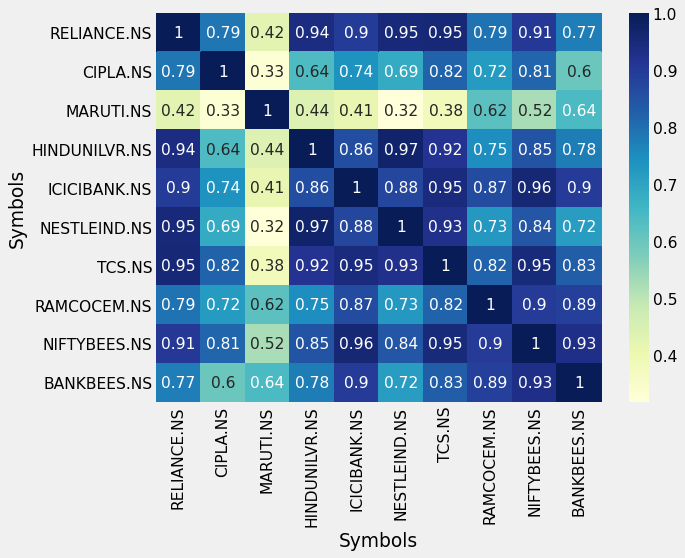

In [48]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

dataplot=sb.heatmap(df.corr(),cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [49]:
# 'RELIANCE.NS':0.2, 'CIPLA.NS':0.1, 'MARUTI.NS':0.1, 'HINDUNILVR.NS':0.1,'ICICIBANK.NS':0.1,'NESTLEIND.NS':0.1,'TCS.NS':0.15,'RAMCOCEM.NS':0.05,'NIFTYBEES.NS':0.05,'BANKBEES.NS':0.05

In [50]:
# :0.2,0.1,0.1,0.1,0.1,0.1,0.15,0.05,0.05,0.05
#0.1,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.25,0.25

In [51]:
w = {'RELIANCE.NS':0.1, 'CIPLA.NS':0.05, 'MARUTI.NS':0.05, 'HINDUNILVR.NS':0.05,'ICICIBANK.NS':0.05,'NESTLEIND.NS':0.05,'TCS.NS':0.1,'RAMCOCEM.NS':0.05,'NIFTYBEES.NS':0.25,'BANKBEES.NS':0.25}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.001853487421816118

In [52]:
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
RELIANCE.NS      0.309027
CIPLA.NS         0.119560
MARUTI.NS        0.134196
HINDUNILVR.NS    0.223813
ICICIBANK.NS     0.237696
NESTLEIND.NS     0.231568
TCS.NS           0.241684
RAMCOCEM.NS      0.103688
NIFTYBEES.NS     0.148781
BANKBEES.NS      0.136745
dtype: float64

In [53]:
w = [0.1,0.05,0.05,0.05,0.05,0.05,0.1,0.05,0.25,0.25]
port_er = (w*ind_er).sum()
port_er

0.17897867407035103

In [54]:
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

Symbols
RELIANCE.NS      0.296695
CIPLA.NS         0.272995
MARUTI.NS        0.307047
HINDUNILVR.NS    0.226310
ICICIBANK.NS     0.354916
NESTLEIND.NS     0.237422
TCS.NS           0.250004
RAMCOCEM.NS      0.304475
NIFTYBEES.NS     1.330519
BANKBEES.NS      1.344030
dtype: float64

In [55]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
RELIANCE.NS,0.309027,0.296695
CIPLA.NS,0.119560,0.272995
MARUTI.NS,0.134196,0.307047
HINDUNILVR.NS,0.223813,0.226310
ICICIBANK.NS,0.237696,0.354916
NESTLEIND.NS,0.231568,0.237422
TCS.NS,0.241684,0.250004
RAMCOCEM.NS,0.103688,0.304475
NIFTYBEES.NS,0.148781,1.330519


In [56]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 100000
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(248) # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [57]:
data = {'Returns':p_ret, 'Volatility':p_vol}

In [58]:
for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,RELIANCE.NS weight,CIPLA.NS weight,MARUTI.NS weight,HINDUNILVR.NS weight,ICICIBANK.NS weight,NESTLEIND.NS weight,TCS.NS weight,RAMCOCEM.NS weight,NIFTYBEES.NS weight,BANKBEES.NS weight
0,0.212654,0.338752,0.147265,0.008156,0.104927,0.045604,0.167752,0.164705,0.124781,0.015456,0.152817,0.068538
1,0.184789,0.232917,0.035015,0.019139,0.107038,0.025548,0.160938,0.207234,0.107949,0.226433,0.053900,0.056805
2,0.182788,0.353434,0.121476,0.064199,0.051242,0.089159,0.156806,0.031104,0.057167,0.200803,0.037039,0.191005
3,0.205303,0.387324,0.115583,0.048097,0.047936,0.042197,0.103589,0.064954,0.270863,0.038841,0.179727,0.088213
4,0.189470,0.239550,0.050973,0.015753,0.106993,0.145146,0.124782,0.148793,0.099070,0.182372,0.064466,0.061651


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

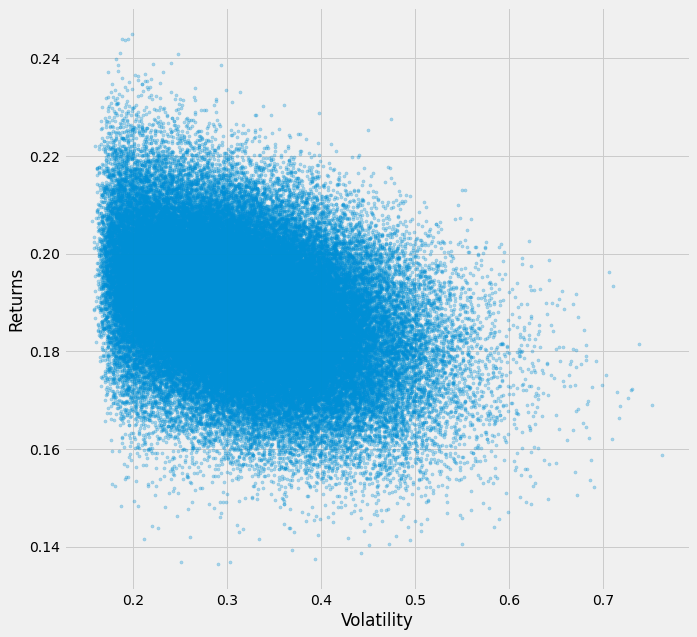

In [59]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [60]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns                 0.206665
Volatility              0.156405
RELIANCE.NS weight      0.057554
CIPLA.NS weight         0.175293
MARUTI.NS weight        0.018050
HINDUNILVR.NS weight    0.144194
ICICIBANK.NS weight     0.069366
NESTLEIND.NS weight     0.245205
TCS.NS weight           0.210855
RAMCOCEM.NS weight      0.061846
NIFTYBEES.NS weight     0.014326
BANKBEES.NS weight      0.003311
Name: 54315, dtype: float64

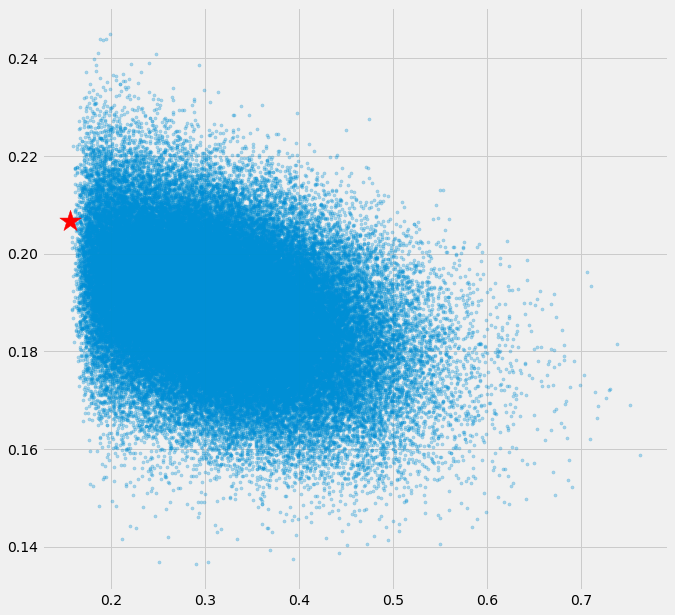

In [61]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [62]:
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns                 0.222125
Volatility              0.159459
RELIANCE.NS weight      0.200964
CIPLA.NS weight         0.120782
MARUTI.NS weight        0.020149
HINDUNILVR.NS weight    0.137264
ICICIBANK.NS weight     0.020182
NESTLEIND.NS weight     0.223902
TCS.NS weight           0.191923
RAMCOCEM.NS weight      0.075801
NIFTYBEES.NS weight     0.002547
BANKBEES.NS weight      0.006485
Name: 82408, dtype: float64

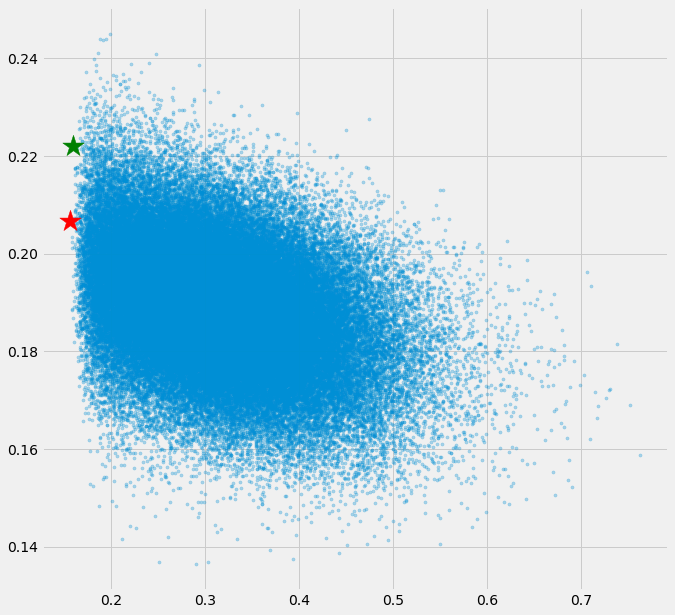

In [63]:
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [64]:
print('Optimal Risk of the Portfolio:', optimal_risky_port[0])

Optimal Risk of the Portfolio: 0.2221252632286226
